#  Выявление закономерностей, определяющих успешность игр для интернет-магазина «Стримчик» 

**Задачи:**

- выгрузить и подготовить данные;
- провести исследовательский анализ данных;
- сформировать портреты пользователей по регионам Северная Америка, Европа и Япония;
- сформулировать и проверить гипотезы.

**Цель:**

- выявить определяющие успешность игры закономерности;
- отработать принцип работы с данными на 2017 год.

**Описание данные**

Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Оглавление

1. [Загрузка данных](#start)\
   [Выводы по блоку знакомства с данными](#conclusion_one)
2. [Подготовка данных](#EDA)\
   2.1 [Предобрабтка](#EDA_1)\
   2.2 [Проверка данных и добавление столбцов](#EDA_2)\
   [Выводы по блоку предобработки](#conclusion_EDA)
3. [Исследовательский анализ данных](#three)\
   3.1 [Количество выпущенных игр по годам](#three_1)\
   3.2 [Продажи по платформам](#three_2)\
   3.3 [Платформы лидирующие по продажам за актуальный период](#three_3)\
   3.4 [Отзывы пользователей и критиков по продажам топ-платформ](#three_4)\
   3.5 [Распределение игр по жанрам](#three_5)\
   3.6 [Распределение продаж по рейтингам ESRB](#three_6)\
   [Выводы по блоку исследовательский анализ данных](#conclusion_three)
4. [Портреты пользователей по регионам Северная Америка, Европа, Япония](#four)\
   4.1 [Пользователи Северной Америки](#four_1)\
   4.2 [Пользователи Европы](#four_2)\
   4.3 [Пользователи Японии](#four_3)\
   [Выводы по блоку портрет пользователя по регионам](#conclusion_four)
5. [Проверка гипотез](#five)\
   5.1 [Средние пользовательские рейтинги платформ Xbox One и PC](#five_1)\
   5.2 [Средние пользовательские рейтинги жанров Action и Sports](#five_2)\
   [Выводы по блоку проверка гипотез](#conclusion_five)
6. [Общий вывод](#conclusion)

<a id="start"></a> 
## Загрузка данных

In [1]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

In [2]:
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_df.duplicated().sum()

0

- Проверим дубликаты по названию игры, платформе и году выпуска.

In [6]:
games_df[games_df[['Name', 'Platform', 'Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


- Удалим дубликаты.

In [7]:
games_df = games_df.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release']).reset_index(drop=True)


<a id="conclusion_one"></a> 
# Вывод по блоку знакомства с данными

Данные выгружены корректно.\
Поля Year_of_Release, Critic_Score и User_Score представлены не в подходящих типах.\
По полям Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating есть пропуски.\
Явных дубликатов не выявлено. Выявлены дубликаты по названию игры, платформе и году выпуска - удалены из данных.

<a id="EDA"></a> 
## Подготовка данных

<a id="EDA_1"></a> 
### Предобрабтка

#### Приведем названия полей к нижнему реистру

In [8]:
games_df.columns = [x.lower() for x in games_df.columns]

#### Анализ пропусков

In [9]:
pd.DataFrame([round(games_df.isna().sum()), round(games_df.isna().mean()*100,)]).style.background_gradient('coolwarm')
# посмотрим количество пропусков и их процентное отношение

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,1.000000,0.000000,269.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8577.000000,6700.000000,6765.000000
1,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,40.000000,40.000000


- По полю `critic_score` пропуски составляют 51%. По `user_score` и `rating` в районе 40%.

In [10]:
games_df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Пропуски по полям `name` и `genre` находятся в одних и тех же строчках. Одна удалена ранее как дубликат. И по остальным полям данные незначительные, игры выпущены в 1993 году. Строчку можно оставить - есть информация по платформе и продажам в Северной Америке и Европе. 

In [11]:
games_df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски `year_of_release` составляют 2% - в исследовательском анализе исключим их, предварительно заменив на 0, так как без года выпуска данные будут не полезны и заполнить их нечем. Указанный год в названни игры может не соответствовать году выпуска.

In [12]:
games_df.query('critic_score.isna()').sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.00,0.00,NaN,NaN,NaN
262,Asteroids,2600,1980.0,Shooter,4.00,0.26,0.00,0.05,NaN,NaN,NaN
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.00,0.00,NaN,NaN,NaN
5360,Freeway,2600,1980.0,Action,0.32,0.02,0.00,0.00,NaN,NaN,NaN
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16286,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16291,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16327,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Пропуски `year_of_release` составляют 51% от всех данных. Это чуть больше половины всех данных. Заполнить их нечем. Удалять половину данных не целесообразно. Оставим как есть.

In [13]:
games_df.query('user_score.isna() and critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games_df.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски по `user_score` и `critic_score` составляют по 40% и в основном по одним и тем же строкам. Заполнять их так же нечем. Оставим как есть.

In [15]:
print('Количество пропусков до 1994 включительно:', len(games_df.query('rating.isna() and year_of_release <= 1994')))

Количество пропусков до 1994 включительно: 482


In [16]:
games_df.query('rating.isna()')['year_of_release'].value_counts()

2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     61
1981.0     46
1991.0     41
1992.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1987.0     16
1990.0     16
1984.0     14
1988.0     14
1985.0     13
1980.0      9
Name: year_of_release, dtype: int64

In [17]:
games_df.query('rating.isna()')['platform'].unique()

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
games_df.query('rating.isna()')['genre'].unique()

array(['Platform', 'Role-Playing', 'Puzzle', 'Shooter', 'Simulation',
       'Action', 'Adventure', 'Racing', 'Misc', 'Sports', 'Fighting',
       'Strategy', nan], dtype=object)

#### Обработка пропусков и изменение типов

- Тип по `year_of_release` поменяем на целочисленный. Строки с пропусками по году удалим сразу, так как по году будет базироваться все исследование.

In [20]:
games_df = games_df.dropna(subset=['year_of_release'])

- TBD (To Be Determined. Будет определено) обозначает, что рейтинг еще в процессе формирования. По сути его еще нет, так же где стоият пропуски.
Поэтому пропуски по `user_score` заменяем на 0, а tbd на -1, чтобы оно отличалось от остальных значений и приводим к типу float64

In [21]:
games_df['user_score'] = games_df['user_score'].replace('tbd', -1).fillna(-1).astype('float64')

- Тип по `critic_score` поменяем на целочисленный - оценка криков представлена в целых числах.

In [24]:
games_df['critic_score'] = games_df['critic_score'].fillna(0).astype('int')

- По остальным полям тип менять не нужно, пропуски оставим как есть в виде Nan.

In [25]:
games_df['rating'] = games_df['rating'].fillna('unknown')

<a id="EDA_2"></a> 
### Проверка данных и добавление столбцов

- Добавим столбец с суммарными продажами во всех регионах.

In [26]:
games_df['all_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

In [27]:
games_df['name'].value_counts()

Need for Speed: Most Wanted                           12
FIFA 14                                                9
Ratatouille                                            9
LEGO Marvel Super Heroes                               9
Madden NFL 07                                          8
                                                      ..
Growlanser: Heritage of War                            1
Ringling Bros. and Barnum & Bailey: Circus Friends     1
Arx Fatalis                                            1
Emergency! Disaster Rescue Squad                       1
Kaitou Rousseau                                        1
Name: name, Length: 11426, dtype: int64

In [28]:
games_df['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       28
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [29]:
games_df['platform'].nunique()

31

In [30]:
sorted(games_df['year_of_release'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0]

In [31]:
games_df['genre'].value_counts()

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [32]:
games_df['genre'].nunique()

12

In [33]:
games_df['na_sales'].value_counts()

0.00     4448
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
14.44       1
13.96       1
2.35        1
2.96        1
4.40        1
Name: na_sales, Length: 401, dtype: int64

In [34]:
games_df['eu_sales'].value_counts()

0.00    5766
0.01    1466
0.02    1290
0.03     911
0.04     702
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: eu_sales, Length: 307, dtype: int64

In [35]:
games_df['jp_sales'].value_counts()

0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: jp_sales, Length: 244, dtype: int64

In [36]:

games_df['other_sales'].value_counts()

0.00    6491
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64

In [37]:
games_df['critic_score'].value_counts()

0     8462
70     252
71     248
75     240
80     235
      ... 
20       3
29       3
13       1
17       1
21       1
Name: critic_score, Length: 82, dtype: int64

In [38]:
games_df['user_score'].value_counts()

-1.0    8982
 7.8     322
 8.0     285
 8.2     276
 8.3     252
        ... 
 0.7       2
 0.2       2
 1.0       2
 9.7       1
 0.0       1
Name: user_score, Length: 96, dtype: int64

In [39]:
test_isna_df = games_df.query('user_score <=0')
test_isna_user_score = test_isna_df.groupby('platform')['all_sales'].agg(['count', 'sum']).reset_index()
test_isna_user_score.sort_values(by='sum', ascending=False)

,platform,count,sum
15,PS,1031,513.13
4,DS,1610,390.20
5,GB,97,254.43
11,NES,98,251.05
16,PS2,907,250.55
10,N64,316,218.01
23,SNES,239,200.04
26,Wii,738,195.16
6,GBA,560,175.06
2,3DS,341,131.08


In [40]:
games_df['rating'].value_counts()

unknown    6677
E          3920
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

**Описание:**\
«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов\
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет\
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет\
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»\
«EC» («Early childhood») — «Для детей младшего возраста»«EC»\
«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга\
«K-A» для детей и взрослых: Игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E.
«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет

<a id="conclusion_EDA"></a> 
# Выводы по блоку предобработки

Названия столбцов приведены к нижнему регистру. Проведена работа с пропусками и заменой типов, где было необходимо.\
По столбцу `name` пропуск возможно связан с утерей данных, так как данная игра выпустилась в 1993 году.\
2% пропусков по `year_of_release` возможно связаны с человеческим фактром или оишбкой технической.\
Пропуски по `user_score`, `critic_score` по большей части находятся в основном в одних строках, при этом пропуски не связаны в годом выпуска - пропуски могут быть связаны с тем, что данные игры не пользовались популярностью и спросом, так же возможно не афишировался их релиз.  'tbd' (to be determined) - рейтинг пока не определён.\
Пропуски по `rating` не связаны с конкретными платформами и жанрами. ESRB была основана в 1994 году, но количество пропусков за этот период небольшое по сравнению со стальным количеством. Так же ESRB - выдаёт рейтинги в Америке и Канаде, Мексике. В Японии свое агенство по выдаче возрастных рейтингов - CERO.\
Добавлен столбец для удобства с обещй суммой продаж.\
В данных представлены игры по 31-ой платформе, в 12 жанрах, выпущенные с 1980 по 2016 года.\
Найдено описание обозначений в рейтинге от организации ESRB.

<a id="three"></a> 
## Исследовательский анализ данных

<a id="three_1"></a> 
### Количество выпущенных игр по годам

In [42]:
games_df = games_df.loc[games_df['year_of_release'] > 0]

In [43]:
games_of_years = games_df.groupby('year_of_release')['name'].count().reset_index()
games_of_years

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


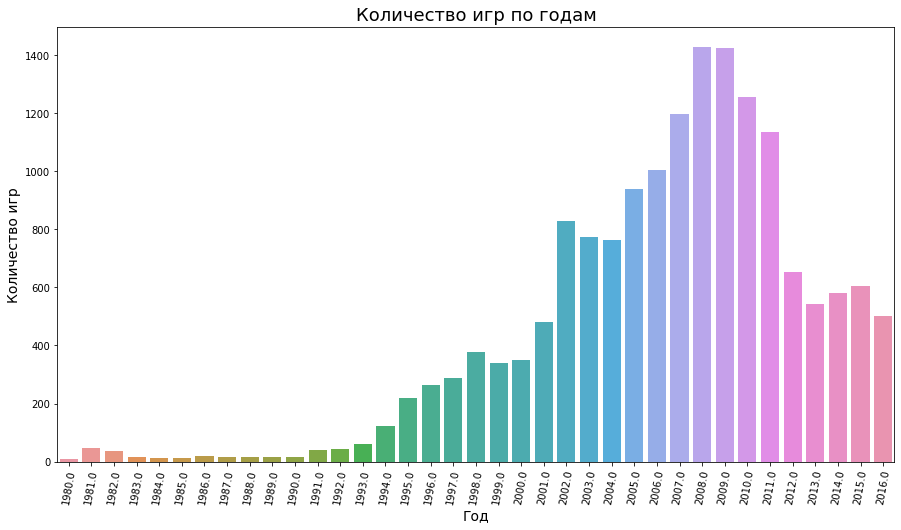

In [44]:
sns.set_palette('colorblind') 
plt.figure(figsize=(15, 8))
sns.barplot(x='year_of_release', y='name', data=games_of_years)
plt.title('Количество игр по годам', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.xticks(rotation=80)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

- с 1980 по 1994 года количество продаваемых игр было небольшим, начался рост продаж игр с 1995 года и до 2001.\
С 2002 количество продаваемых игр выросло еще почти в 2 раза и достигла пика в 2008-2009 годах, после этого стало падать, сильно уменьшилось в 2012 году и к 2015-2016 году достигло отметок чуть больше, чем в 2001 году.

<a id="three_2"></a> 
### Продажи по платформам

In [45]:
platform_sales = games_df.groupby('platform')[['all_sales']].sum().reset_index()
platform_sales = platform_sales.sort_values(by='all_sales', ascending=False)
platform_sales

,platform,all_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


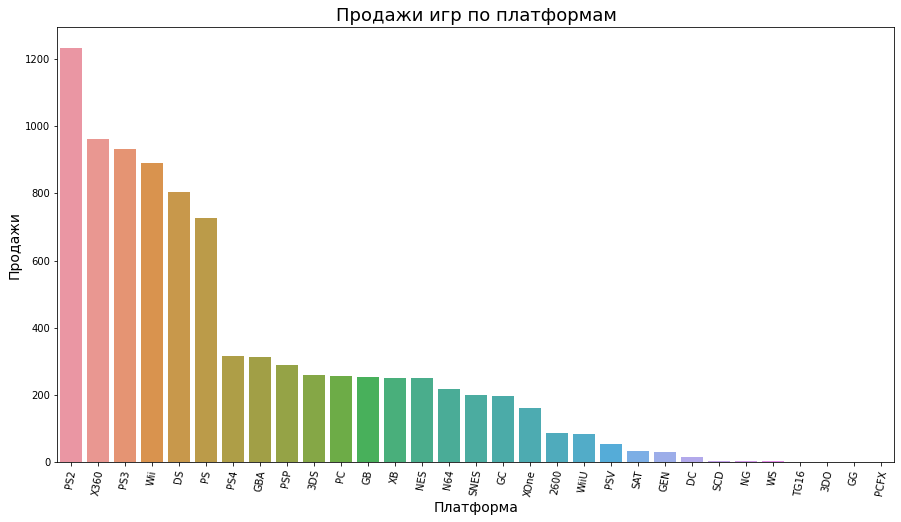

In [46]:
sns.set_palette('colorblind') 
plt.figure(figsize=(15, 8))
sns.barplot(x='platform', y='all_sales', data=platform_sales)
plt.title('Продажи игр по платформам', fontsize=18)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.xticks(rotation=80)
plt.show()

In [47]:
platform_sales_top = games_df.groupby('platform')[['all_sales']].sum().reset_index()
platform_sales_top = platform_sales_top.sort_values(by='all_sales', ascending=False).head(5)
platform_sales_top

,platform,all_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78


In [48]:
def platform_sales_of_years(name, data):
    row_df = data[(data['platform'] == name)]
    tab = row_df.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return tab

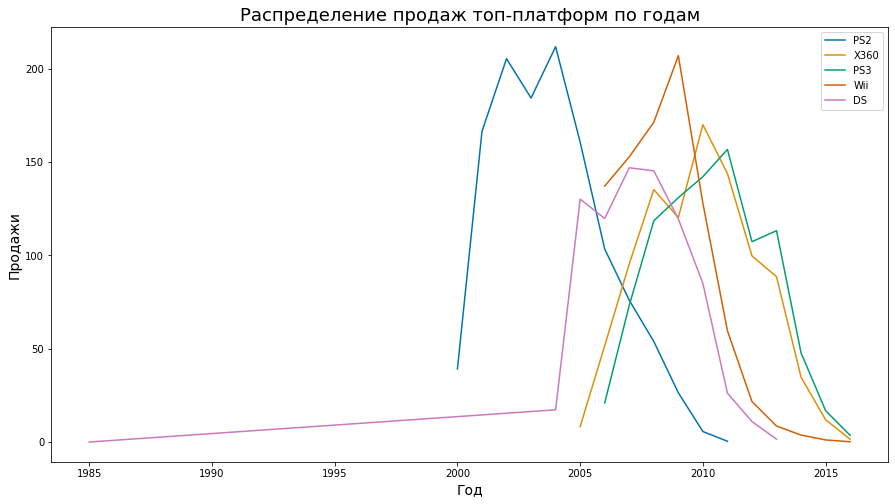

In [49]:
plt.figure(figsize=(15,8))
plt.title('Распределение продаж топ-платформ по годам', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Продажи', fontsize=14)

for plat in list(platform_sales_top['platform']):
    sns.lineplot(data=platform_sales_of_years(plat,games_df)['all_sales'], label=plat)
    plt.legend()

- По графику видно, что игры на платформе DS выпускаются с 1985. Проверили информацию - это ошибка. Удалим такие строчки.

In [50]:
games_df.query('platform == "DS"')['year_of_release'].unique()

array([2006., 2005., 2010., 2009., 2004., 2007., 2012., 2008., 2011.,
       2013., 1985.])

In [51]:
games_df.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15956,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,0,-1.0,unknown,0.02


In [52]:
games_df = games_df[~((games_df['platform'] == "DS") & (games_df['year_of_release'] == 1985))]

- Перестроим график

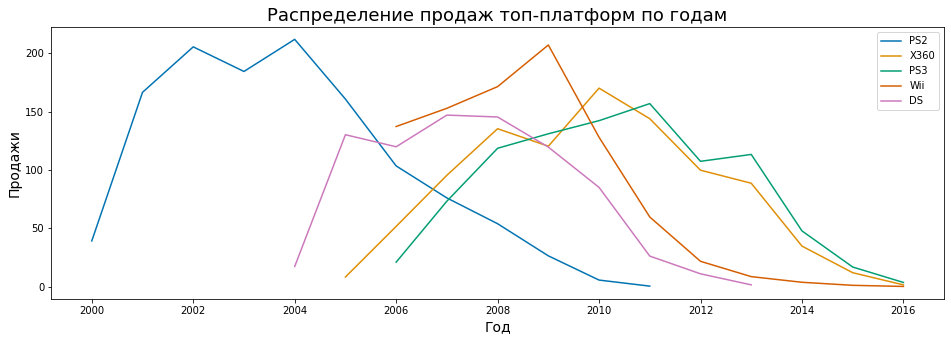

In [53]:
plt.figure(figsize=(16,5))
plt.title('Распределение продаж топ-платформ по годам', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Продажи', fontsize=14)

for plat in list(platform_sales_top['platform']):
    sns.lineplot(data=platform_sales_of_years(plat,games_df)['all_sales'], label=plat)
    plt.legend()

- Теперь распределение выглядет корректно.

In [54]:
temp = games_df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
print()
print('Среднее время жизни платформы за весь период:', time_life['life'].median())
print()


Среднее время жизни платформы за весь период: 7.0



In [55]:
temp_2 = games_df.query('year_of_release > 2000')
time_life_2 = temp_2.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life_2['life'] = time_life_2['max'] - time_life_2['min'] + 1
print()
print('Среднее время жизни платформы после 2000 года:', time_life_2['life'].median())
print()


Среднее время жизни платформы после 2000 года: 7.0



- За весь представленный период по суммарным продажам лидируют платформы: PS2, X360, PS3, Wii, DS.\
Больше всео продаж по PS2 - 1233.56 млн. проданных копий, X360 и PS3 недалеко ушли друг от друга - 961.24 и 931.33 соответсвенно. По Wii - 891.18 млн. копий, по DS - 802.78 млн. копий.\
Среднее время жизни платформы составляет примерно 7 лет. Пик приходится примерно в срок 3-4 лет. Все платформы по суммарным продажам ушли на спад с 2010 по 2015 года и уже не явлются популярными.

In [56]:
# Комментарий ревьюера
temp = games_df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

<a id="three_3"></a> 
### Платформы лидирующие по продажам за актуальный период

- За актуальным период возьмем 2012-2016 года. К этому периоду закончился пик количества продаваемых игр. Возможно появились новые платформы, по которым начнется рост выпуска новых игр и соответственно продажи. Проверим за этот период какие лидирую платформы по продажам.

In [57]:
games_df_new = games_df.query('year_of_release > 2011')

In [58]:
platform_sales_2012_2016 = games_df_new.groupby('platform')[['all_sales']].sum().reset_index()
platform_sales_2012_2016 = platform_sales_2012_2016.sort_values(by='all_sales', ascending=False).head(6)
platform_sales_2012_2016

,platform,all_sales
4,PS4,314.14
3,PS3,288.78
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19


In [59]:
def platform_sales_of_years_2012_2016(name, data):
    row_df = data[(data['platform'] == name)]
    tab = row_df.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return tab

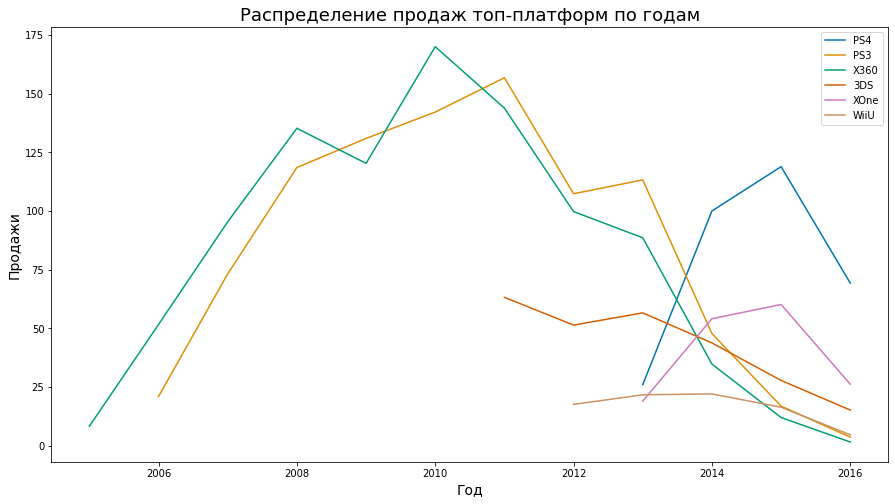

In [60]:
plt.figure(figsize=(15,8))
plt.title('Распределение продаж топ-платформ по годам', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Продажи', fontsize=14)

for plat in list(platform_sales_2012_2016['platform']):
    sns.lineplot(data=platform_sales_of_years(plat,games_df)['all_sales'], label=plat)
    plt.legend()

- За период 2012-2016 года Картинка по лидирующим продажам изменилась - актуальными платформами выступают: PS4, PS3, X360, 3DS, XOne. Лидиоуют PS4, PS3, но и X360 остается в лидирах. Появились 3DS и XOne.  

In [63]:
order = games_df_new.groupby('platform')[['all_sales']].median().sort_values(by='all_sales').iloc[::-1].index

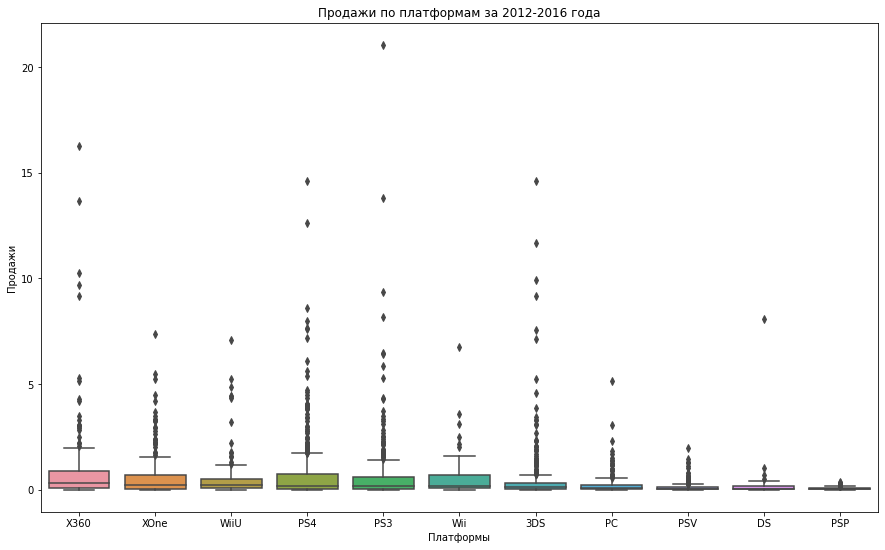

In [64]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = games_df_new, y = 'all_sales', x='platform', order=order)
    .set(title = 'Продажи по платформам за 2012-2016 года', 
         xlabel = 'Платформы', 
         ylabel = 'Продажи'))
plt.show()

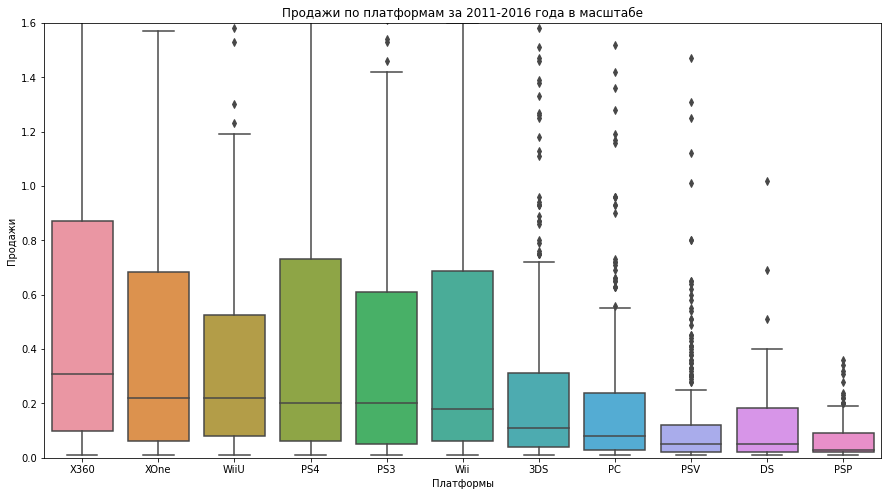

In [65]:
plt.figure(figsize=(15, 8))
plt.ylim(0, 1.6)
(sns.boxplot(data = games_df_new, y = 'all_sales', x='platform', order=order)
    .set(title = 'Продажи по платформам за 2011-2016 года в масштабе', 
         xlabel = 'Платформы', 
         ylabel = 'Продажи'))
plt.show()

- Медианное значений продаж и размах выше всего на X360, затем идет XOne и WiiU по медианному значению. Далее идут PS4, PS3 медиана на одном уровне, размах больше у PS4. Меньше всего у платфомры PSP.
- Более стабильные продажи на платформах X360, XOne, WiiU, PS4, PS3.

<a id="three_4"></a> 
### Отзывы пользователей и критиков по продажам топ-платформ

In [66]:
games_df_new['critic_score'].unique()

array([97,  0, 83, 73, 78, 87, 71, 88, 82, 85, 74, 86, 95, 76, 93, 84, 81,
       90, 77, 80, 92, 70, 72, 79, 75, 91, 66, 89, 67, 57, 68, 65, 55, 63,
       54, 61, 94, 33, 64, 60, 69, 59, 52, 96, 53, 62, 48, 50, 32, 43, 56,
       34, 58, 47, 46, 31, 49, 40, 39, 51, 36, 23, 45, 42, 38, 24, 19, 44,
       20, 25, 35, 13, 37, 26])

- Создадим две таблицы, где critic_score и user_score исключим заглушки.

In [67]:
games_df_new_no_plug_critic_score = games_df_new.query('critic_score > 0')

In [68]:
games_df_new_no_plug_user_score = games_df_new.query('user_score >= 0')

In [70]:
list_platform_sales_top = list(games_df_new.groupby('platform')['all_sales'].sum().sort_values(ascending=False).index[:6])
list_platform_sales_top

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU']

In [71]:
platform_sales_df_critic_score = games_df_new_no_plug_critic_score[games_df_new_no_plug_critic_score['platform'].isin(list_platform_sales_top)]

In [72]:
platform_sales_df_user_score = games_df_new_no_plug_user_score[games_df_new_no_plug_user_score['platform'].isin(list_platform_sales_top)]

In [73]:
def platform_top_cor(name, data):
    tab = data[(data['platform'] == name)]
    return tab

In [74]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

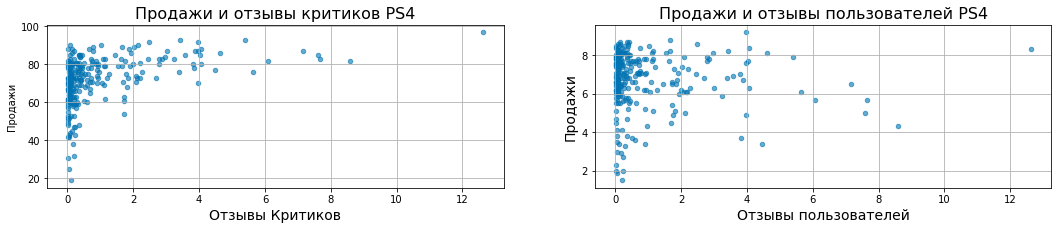

Корреляция между отзывами критиков и продажами PS4: 0.406567902061781
Корреляция между отзывами пользователей и продажами PS4: -0.031957110204556376



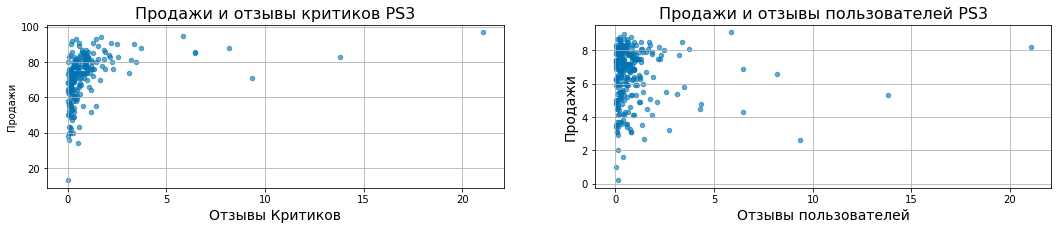

Корреляция между отзывами критиков и продажами PS3: 0.3341517575509856
Корреляция между отзывами пользователей и продажами PS3: -0.006205767686051522



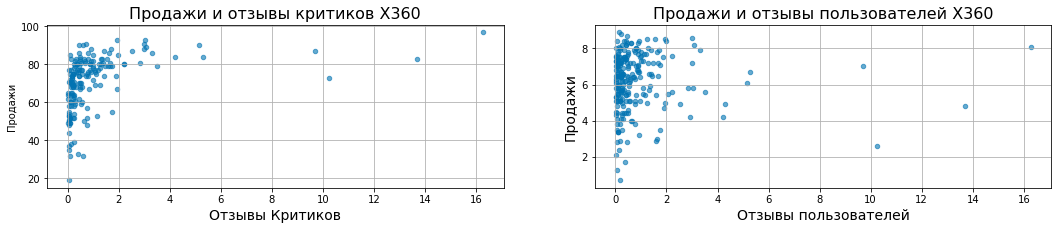

Корреляция между отзывами критиков и продажами X360: 0.36057348885073365
Корреляция между отзывами пользователей и продажами X360: 0.0061639786462133256



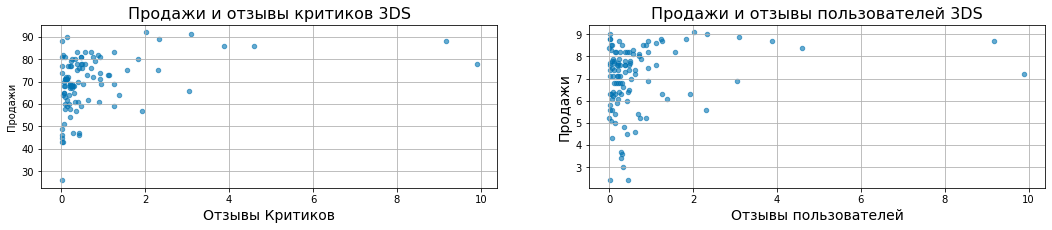

Корреляция между отзывами критиков и продажами 3DS: 0.32080286953607845
Корреляция между отзывами пользователей и продажами 3DS: 0.19758263411038596



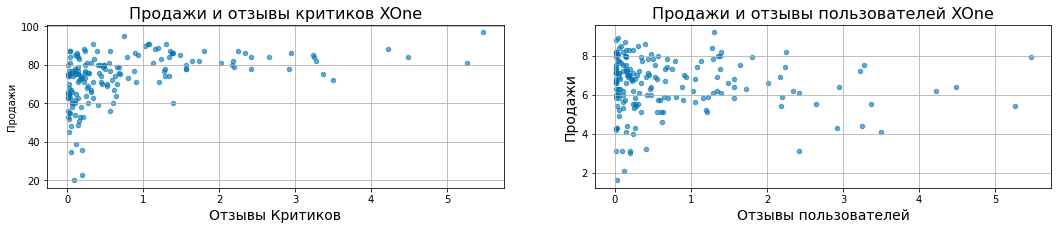

Корреляция между отзывами критиков и продажами XOne: 0.41699832800840175
Корреляция между отзывами пользователей и продажами XOne: -0.06892505328279412



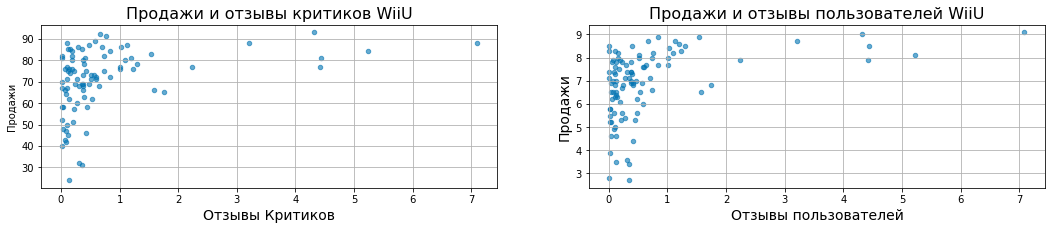

Корреляция между отзывами критиков и продажами WiiU: 0.3483797601201749
Корреляция между отзывами пользователей и продажами WiiU: 0.4002190202148617



In [75]:
for plat in list(platform_sales_2012_2016['platform']):
    plt.figure(figsize=(18, 3))
    ax1 = plt.subplot(1, 2, 1)
    platform_top_cor(plat,platform_sales_df_critic_score).plot(x='all_sales', y='critic_score', kind='scatter', alpha=0.6, grid=True, ax=ax1)
    plt.xlabel('Отзывы Критиков', fontsize=14)
    plt.title(f'Продажи и отзывы критиков {plat}', fontsize=16)
    plt.ylabel('Продажи')
    ax2 = plt.subplot(1, 2, 2)
    platform_top_cor(plat,platform_sales_df_user_score).plot(x='all_sales', y='user_score', kind='scatter', alpha=0.6, grid=True, ax=ax2) 
    plt.xlabel('Отзывы пользователей', fontsize=14)
    plt.title(f'Продажи и отзывы пользователей {plat}', fontsize=16)
    plt.ylabel('Продажи', fontsize=14)
    plt.show()
    print(f'Корреляция между отзывами критиков и продажами {plat}:', platform_top_cor(plat,platform_sales_df_critic_score)['all_sales'].corr(platform_top_cor(plat,platform_sales_df_critic_score)['critic_score']))
    print(f'Корреляция между отзывами пользователей и продажами {plat}:', platform_top_cor(plat,platform_sales_df_user_score)['all_sales'].corr(platform_top_cor(plat,platform_sales_df_user_score)['user_score']))
    print()

- у всех топ-платформ за актуальный период корреляция между продажами и отзывами критиков значительно выше, чем между продажами и отзывами пользователей, кроме платформы - WiiU - есть связь между продажами и отзывами критиков и пользователей. Выше всего показатели у XOne по кореляции между отзывами критиков и продажми - 42%. А корреляция между отзывами пользователей и продажами выше сего корреляция у WiiU - 40%. Продажи по исследуемым платформам зависят от отзывов критиков, а по WiiU и от отзывов пользваталей.

<a id="three_5"></a> 
### Распределение игр по жанрам

In [76]:
genre_name_count = games_df_new.groupby('genre')['name'].count().reset_index()
genre_name_count = genre_name_count.sort_values(by='name', ascending=False)
genre_name_count

,genre,name
0,Action,1031
7,Role-Playing,370
1,Adventure,302
10,Sports,267
8,Shooter,235
3,Misc,192
6,Racing,115
2,Fighting,109
4,Platform,85
9,Simulation,80


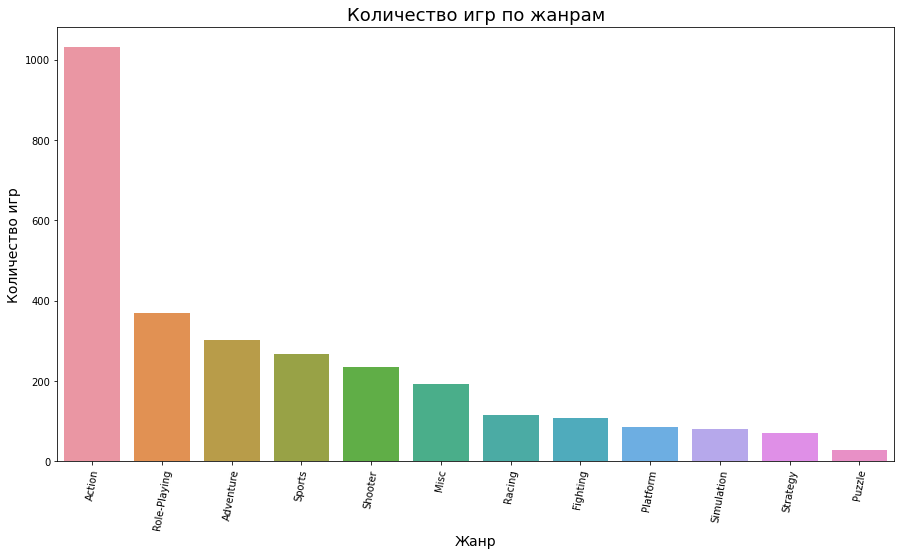

In [77]:
sns.set_palette('colorblind') 
plt.figure(figsize=(15, 8))
sns.barplot(x='genre', y='name', data=genre_name_count)
plt.title('Количество игр по жанрам', fontsize=18)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.xticks(rotation=80)
plt.show()

- За актуальный период по жанрам по количеству игр лидирует жанр Action (Экшн) - игры, как правило, ставят простые цели, и достижение их очевидно - больше 1000 игр.\
На втором месте, но значительно меньше по количеству игр - жанр Role-playing - это игра, в которой игроки берут на себя роли персонажей в вымышленном сеттинге - 370 игр.\
На третьем месте - Adventure - это приключенческая игра, исследование мира, решение загадок, сбор полезных предметов и общение со встреченными героями - 302 игры.\
На четвертом и пятом - Spotrs и Shooter соответственно. 

In [78]:
genre_sales = games_df_new.groupby('genre')['all_sales'].sum().reset_index()
genre_sales = genre_sales.sort_values(by='all_sales', ascending=False)
genre_sales

,genre,all_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.06
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


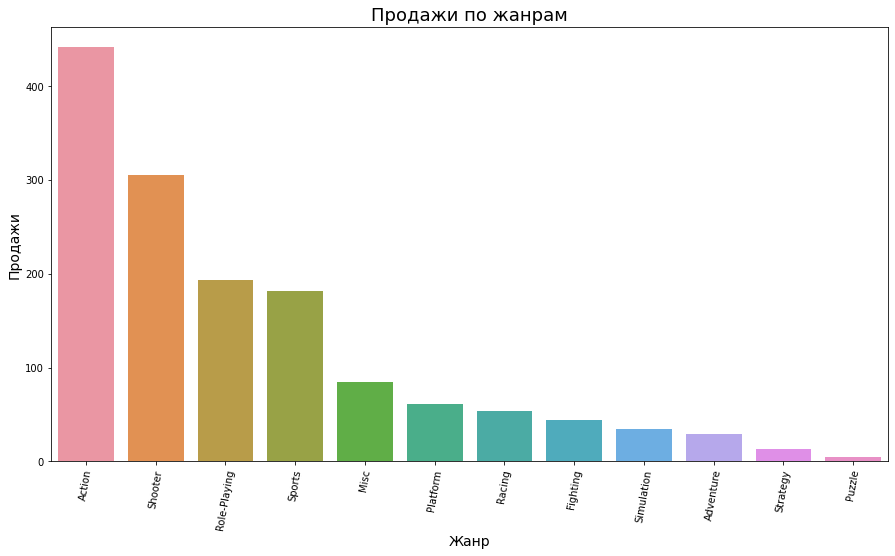

In [79]:
sns.set_palette("Blues")
plt.figure(figsize=(15, 8))
sns.barplot(x='genre', y='all_sales', data=genre_sales)
plt.title('Продажи по жанрам', fontsize=18)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.xticks(rotation=80)
plt.show()

In [80]:
my_order = games_df_new.groupby('genre')[['all_sales']].median().sort_values(by='all_sales').iloc[::-1].index

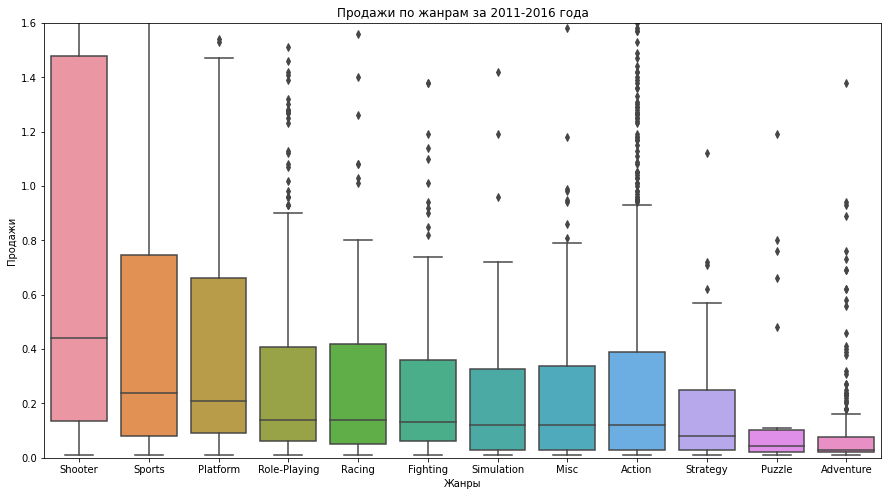

In [81]:
plt.figure(figsize=(15, 8))
plt.ylim(0, 1.6)
(sns.boxplot(data = games_df_new, y = 'all_sales', x='genre', order=my_order)
    .set(title = 'Продажи по жанрам за 2011-2016 года', 
         xlabel = 'Жанры', 
         ylabel = 'Продажи'))
plt.show()

- За актуальный период по суммарным продажам так же лидирует Action - 441 млн. копий.\
Но по диаграмме размаха видно, что у жанра Shooter - - основан на стрельбе и уничтожении врагов - медианное значение продаж значительно выше, и больше квартильный раpмах.\
На втором месте по медианному значению жанр Sports - видеоигра, которая имитирует занятия спортом.\
На третьем Platform - прохождение персонажем разные уровни, преодолевая препятствия.\
Action по медианному значению оказался на 9 месте. По общем продажам он на первом месте из-за больших выбросов - конкретных игр, которые много собрали.\
Более стабильные продаваемые жанры: Shooter, Sports, Platform.

<a id="three_6"></a> 
### Распределение продаж по рейтингам ESRB

In [82]:
rating_sales = games_df_new.groupby('rating')['all_sales'].sum().reset_index()
rating_sales = rating_sales.sort_values(by='all_sales', ascending=False)
rating_sales

,rating,all_sales
2,M,510.11
4,unknown,330.82
0,E,287.16
3,T,162.94
1,E10+,155.49


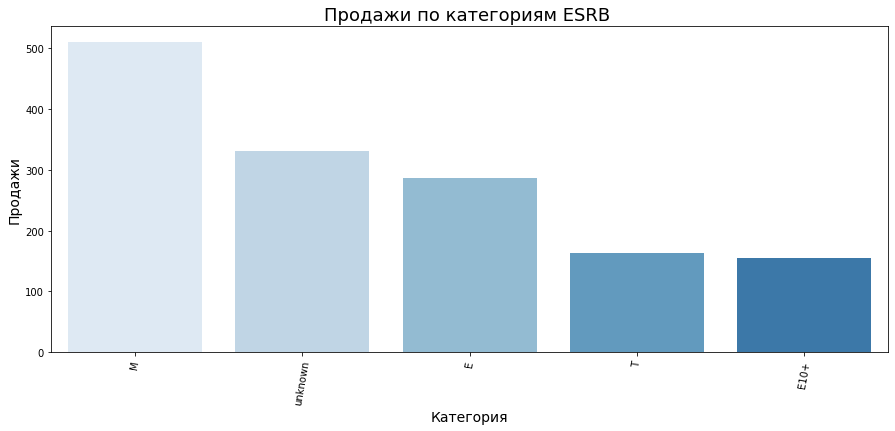

In [83]:
sns.set_palette("Blues")
plt.figure(figsize=(15, 6))
sns.barplot(x='rating', y='all_sales', data=rating_sales)
plt.title('Продажи по категориям ESRB ', fontsize=18)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.xticks(rotation=80)
plt.show()

<a id="conclusion_three"></a> 
# Выводы по блоку исследовательский анализ данных

- По итогам исследования выявлено, что за весь период пик по количеству игр достигнут в отметке 2008-2009 годах и далее идет на спад.
- За весь период лидирующие платформы по продажам: PS2 - 1233.56 млн. копий, X360 - 961.24 млн. копий, PS3 - 931.33, Wii - 891.18 и DS - 802.78.
- За актуальный период взят период с 2012 по 2016 года. По нему сделаны такие наблюдения:\
Лидирующие платформы по продажам: PS4, PS3, X360, 3DS, XOne.\
Медианное значение продаж выше всего у X360.\
Отзывы критиков сильнее влияют на продажи, чем отзывы пользователей.\
Лидирующие жанры по количеству игр: Action, Role-playing, Adventure, Spotrs и Shooter.\
Лидирующие жанры по сумме продаж: Action, Shooter, Role-playing и Spotrs.\
Лидирующая категория по рейтингу ESRB - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.\
За актуальный период по данным всего 5 категорий: «M» («Mature») — «Для взрослых», «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» и одна получилась категория неизвестная, но с большим количеством игр.

<a id="four"></a> 
## Портреты пользователей по регионам Северная Америка, Европа, Япония

In [84]:
def region_platform(name, data):
    #по платформам
    tab = data.groupby('platform')[[name]].sum().reset_index().sort_values(by=name, ascending=False)
    tab['sales_share'] = round(tab[name]/tab[name].sum()*100, 2)
    list_row = list(tab['platform'][5:11])
    row = []
    for i in list(tab['platform']):
        if i in list_row:
            i = 'other'
            row.append(i)
        else:
            row.append(i)
    tab['platform_top'] = row
    tab = tab.groupby('platform_top')[['sales_share']].sum().reset_index()
    print(tab)
    print()
    
    #по жанрам
    tab_two = data.groupby('genre')[[name]].sum().reset_index().sort_values(by=name, ascending=False)
    tab_two['sales_share'] = round(tab_two[name]/tab_two[name].sum()*100, 2)
    list_row = list(tab_two['genre'][5:12])
    row = []
    for i in list(tab_two['genre']):
        if i in list_row:
            i = 'other'
            row.append(i)
        else:
            row.append(i)
    tab_two['genre_top'] = row
    tab_two = tab_two.groupby('genre_top')[['sales_share']].sum().reset_index()
    print(tab_two)
    print()
    
    #по рейтингу
    tab_three = data.groupby('rating')[[name]].sum().reset_index().sort_values(by=name, ascending=False)
    tab_three['sales_share'] = round(tab_three[name]/tab_three[name].sum()*100, 2)
    print(tab_three)
    print()
   
    
    sns.set_palette('Accent') 
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    axs[0].set_title(f'Платформы {name}', fontsize=14)
    axs[0].pie(tab['sales_share'], labels= tab['platform_top'], autopct='%1.1f%%')
    axs[1].set_title(f'Жанры {name}', fontsize=14)
    axs[1].pie(tab_two['sales_share'], labels= tab_two['genre_top'], autopct='%1.1f%%')
    axs[2].set_title(f'Рейтинги {name}', fontsize=14)
    axs[2].pie(tab_three['sales_share'], labels= tab_three['rating'], autopct='%1.1f%%')
    
    
    return plt.show()

<a id="four_1"></a> 
### Пользователи Северной Америки

  platform_top  sales_share
0          3DS         9.36
1          PS3        17.49
2          PS4        18.40
3         X360        23.70
4         XOne        15.76
5        other        15.30

      genre_top  sales_share
0        Action        30.09
1          Misc         6.46
2  Role-Playing        10.83
3       Shooter        24.50
4        Sports        13.80
5         other        14.32

    rating  na_sales  sales_share
2        M    231.57        39.18
0        E    114.37        19.35
4  unknown    103.31        17.48
1     E10+     75.70        12.81
3        T     66.02        11.17



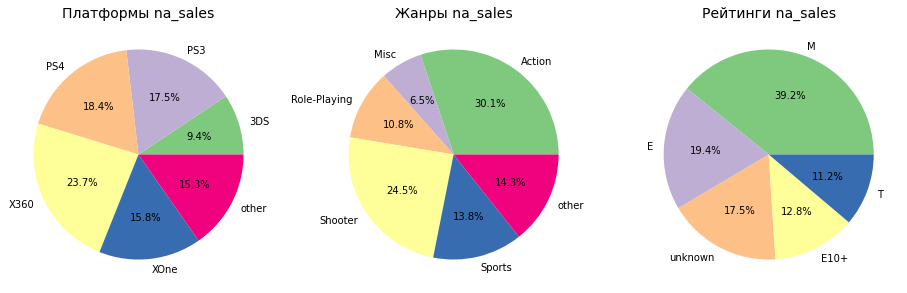

In [85]:
region_platform('na_sales', games_df_new)

- По Северной Америке наибольшую долю по продажам занимает платформа X360 - 23.7%, затем PS4, PS3 и XOne.
- По жанрам - наибольшую часть занимает игры Action - около 1/3 - 30.1%, затем Shooter - 24.5%, на третьем - Sports -13.8%.
- По рейтингу ESRB - самые популярные игры в категории «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет - 39%.

<a id="four_2"></a> 
### Пользователи Европы

  platform_top  sales_share
0          3DS         8.41
1          PS3        21.08
2          PS4        27.84
3         X360        14.70
4         XOne        10.18
5        other        17.78

      genre_top  sales_share
0        Action        31.44
1        Racing         5.38
2  Role-Playing         9.58
3       Shooter        22.39
4        Sports        13.63
5         other        17.58

    rating  eu_sales  sales_share
2        M    193.96        38.27
0        E    113.02        22.30
4  unknown     91.50        18.05
1     E10+     55.37        10.93
3        T     52.96        10.45



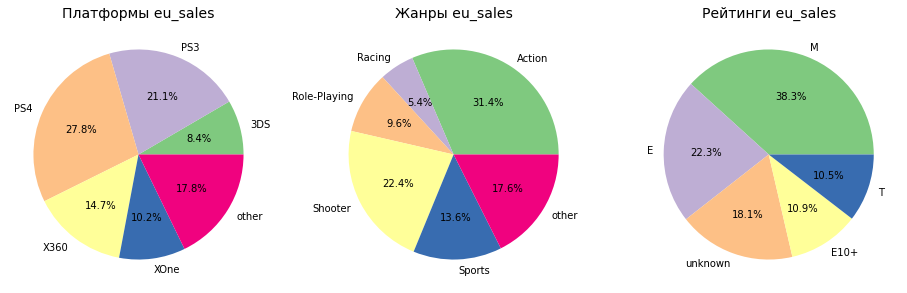

In [86]:
region_platform('eu_sales', games_df_new)

- По Европе наибольшую долю по продажам занимает платформа PS4 - 27.8%, затем PS3-21%, X360 - 14.7% и XOne. 3DS так же на последнем месте.
- По жанрам - наибольшую часть занимает игры Action - 31.4%, затем Shooter - 22.4%, на третьем: Sports - 13.6%
- По рейтингу ESRB - наибольшая доля игр категории «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет - 38.3%

<a id="four_3"></a> 
### Пользователи Японии

  platform_top  sales_share
0          3DS        45.59
1          PS3        18.32
2          PS4         8.29
3          PSV        10.93
4         WiiU         6.76
5        other        10.13

      genre_top  sales_share
0        Action        27.42
1      Fighting         4.90
2          Misc         6.68
3  Role-Playing        33.98
4    Simulation         5.41
5         other        21.62

    rating  jp_sales  sales_share
4  unknown    108.84        56.52
0        E     28.33        14.71
3        T     26.02        13.51
2        M     21.20        11.01
1     E10+      8.19         4.25



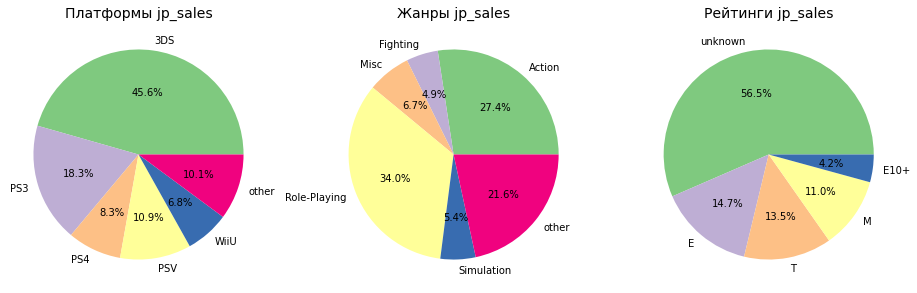

In [87]:
region_platform('jp_sales', games_df_new)

- По Японии наибольшую долю (почти половину) по продажам занимает платформа 3DS - 45.6%, затем PS3, PSV, PS4 и WiiU.
- По жанрам - популярные игры жанра Role-Playing - 34%, затем Action - 27.4%. Shooter не попадает в 5-ку.
- По рейтингу ESRB - больше половины игры с неопределенным рейтингом - 56.6%, затем идут категории «E» («Everyone») — «Для всех» - 14.7% и «T» («Teen») — «Подросткам» - 13.5%, «M» («Mature») — «Для взрослых» на четвертом месте - 11%.

<a id="conclusion_four"></a> 
# Выводы по блоку портрет пользователя по регионам

По трем отдаленным регионам показатели отличаются.
- В Северной Америке предпочитают больше всего игры на X360, В Европе - игры на PS4, в Японии - 3DS - портативная игровая система производства Nintendo.
- По жанрам - в Северной Америке и в Европе предпочитают игры Action и Shooter, а в Японии - ролевые игры Role-Playing.
- По рейтингу ESRB - в Северной Америке и в Европе лидируют игры категории «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет, и с большим отрывом «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов, а в Японии данная категория занимает первое место. Категория «M» («Mature») — «Для взрослых» - на третьем месте.

<a id="five"></a> 
## Проверка гипотез

<a id="five_1"></a> 
### Средние пользовательские рейтинги платформ Xbox One и PC

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
**Альтернативная гпиотеза:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются.\
**Уровень статистической значимости:** alpha = 0.05.\
**Метод проверки:** T-критерий Стьюдента.

- Используем данные с отзывами пользователей `user_score` без 0.

In [89]:
games_df_user_score = games_df_new.query('user_score >= 0')

In [90]:
Xbox_One_df = games_df_user_score.query('platform == "XOne"')

In [91]:
PC_df = games_df_user_score.query('platform == "PC"')

In [92]:
Xbox_One_user_score_mean = Xbox_One_df['user_score'].mean()
PC_user_score_mean = PC_df['user_score'].mean()

print(f'Среднее значение рейтинга пользователей платформы Xbox One: {Xbox_One_user_score_mean}')
print(f'Среднее значение рейтинга пользователей платформы PC: {PC_user_score_mean}')
print()

alpha = 0.05 
results = st.ttest_ind(Xbox_One_df['user_score'], PC_df['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее значение рейтинга пользователей платформы Xbox One: 6.521428571428572
Среднее значение рейтинга пользователей платформы PC: 6.4286407766990274

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


- p-value получилось 0.553, вероятность случайно получить такое различие равна около 55%. Это большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
- Не получилось отвергнуть нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<a id="five_2"></a> 
### Средние пользовательские рейтинги жанров Action и Sports

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.\
**Альтернативная гпиотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\
**Уровень статистической значимости:** alpha = 0.05.\
**Метод проверки:** T-критерий Стьюдента.

In [93]:
Action_df = games_df_user_score.query('genre == "Action"')

In [94]:
Sports_df = games_df_user_score.query('genre == "Sports"')

In [95]:
Action_user_score_mean = Action_df['user_score'].mean()
Sports_user_score_mean = Sports_df['user_score'].mean()

print(f'Среднее значение рейтинга пользователей жанра Action: {Action_user_score_mean}')
print(f'Среднее значение рейтинга пользователей жанра Sports: {Sports_user_score_mean}')
print()

alpha = 0.05 
results = st.ttest_ind(Action_df['user_score'], Sports_df['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее значение рейтинга пользователей жанра Action: 6.825047801147227
Среднее значение рейтинга пользователей жанра Sports: 5.455670103092784

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


- p-value получилось 4.8045233804629176e-26.
- Отвергаем нулевую гипотезу, о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Получить одинаковые рейтинги по жанрам Action и Sports вероятности почти нет.


- Принцип формулирования нулевой и альтернативной гипотез заключается в том, чтобы проверить обоснованность утверждения по нулевой гипотезе, и если она окажетеся опровергнутой, то принимаем альтернативную гипотезу, которая противоречит нулевоей.
- Применили t-тест, так как он подходит для для сравнения средние двух генеральных совокупностей при условии, что их дисперсии равны. В тесте параметр equal_var не указали, по умолчанию он принимает значение True, что означает, что дисперсии равны.
- В первом случае проверяли по двум платформам Xbox One и PC утверждение, что средние пользовательские рейтинги по ним одинаковые и по прохождению t-тесты получили обоснование не отвергать данную гипотезу.
- Во втором - утверждение о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые - 
после t-теста можем смело отвергнуть данную гипотезу, и принять альтернативную - что средние пользовательские рейтинги различны. 

<a id="conclusion_five"></a> 
# Выводы по блоку проверка гипотез

- Проверили две гипотезы:\
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

- В результате статистического теста можно сделать выводы:\
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
А средние пользовательские рейтинги жанров Action и Sports различны.

<a id="conclusion"></a> 
## Общий вывод

В распоряжении были исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Проведены следущие шаги:**
1. Выгрузка данных, просмотр общей информации и проверка на дубликаты.
2. Проведена предобработка - замена типов и заполнение пропусков, где необходимо; добавление доп. столбца.
3. Проведен исследовательский анализ данных.
4. Составлены портреты пользователей регионов NA, EU, JP.
5. Проверка гипотез.

**По результатам проведенной работы сделаны следующие наблюдения:**

- В данных представлена информация продаж игр в 12 жанрах, на 31-ой платформе за период с 1980 по 2016 года.
- За весь период наибольшие суммарные продажи были по платформам: PS2, X360, PS3, Wii, DS.
- За актуальный период - с 2012 года по 2016 год:\
  Лидирующие платформы по общим продажам: PS4, PS3, X360, 3DS, XOne, но более стабильные по медианному значению продаж X360, XOne, WiiU, PS4, PS3.
  Отзывы критиков влияют на продажи, связи между отзывами пользователей и продажами почти нет, кроме платформы WiiU.\
  Лидирующие жанры по количеству игр: Action, Role-playing, Adventure, Spotrs и Shooter.\
  Лидирующие жанры по сумме продаж: Action, Shooter, Role-playing и Spotrs, но более стабильные продаваемые жанры: Shooter, Sports, Platform - по ним выше медианное значение.\
  Лидирующая категория по ESRB - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. На втором месте - без указания категории.


- **Портреты пользователей по регионам:**

 ***Северная Америка***\
  По Северной Америке наибольшую долю по продажам занимает платформа X360 - 23.7%, затем PS4 - 18.4% и PS3 - 17.5%.\
  По жанрам - наибольшую часть занимает игры Action - 30.1%, затем Shooter - 24.5% и  Sports -13.8%.\
  По рейтингу ESRB - самые популярные игры в категории «M» («Mature») — «Для взрослых» -  39.2%, затем «E» («Everyone») — «Для всех» - 19.4%
  
  ***Европа***\
  По Европе наибольшую долю по продажам занимает платформа PS4 - 27.8%, затем PS3 - 21%.\
  По жанрам - наибольшую часть занимает игры Action - 31.4%, затем Shooter - 22.4%.\
  По рейтингу ESRB - самые популярные игры в категории «M» («Mature») — «Для взрослых» - 38.3%, затем «E» («Everyone») — «Для всех» - 22.3%.

  ***Япония***\
  По Японии наибольшую долю по продажам занимает платформа 3DS - 45.6%, затем PS3 - 18.3%.\
  По жанрам - наибольшую часть занимает игры Role-Playing - 34%, затем Action - 27.4%.\
  По рейтингу ESRB - самые популярные игры без указания категории - 56.6%, затем идут категории «E» («Everyone») — «Для всех» - 14.7% и «T» («Teen») — «Подросткам» - 13.5%
  
  
- **Проверены гипотезы и сделаны выводы:**\
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
А средние пользовательские рейтинги жанров Action и Sports различны.

**Итог**

**Определяющие успешность игры закономерности:**
- выход игры на стабильных по продажам платформах X360, XOne, WiiU, PS4, PS3; 
- в жанрах: Shooter, Sports, Platform, так же выстреливающие могут быть Action, Role-Playing;
- в категориях по ESRB - «M» («Mature») — «Для взрослых» и  «E» («Everyone») — «Для всех», что касается игр вышедщих в Штатах;
- заинтересованность критиков в даче оценке по вышедшей игре.

**Принцип работы с данными на 2017 год:**
- следить за потенциально прибыльными платформами и выходами новых - есть у них тенденция набирать пик популярности за 3-4 года, затем появляются новые - среднее время жизни платформы 7 лет;
- анализировать популярные жанры и на какую категорию ESRB больше спрос.
- для продаж в разных регионах стоит обращать внимание так же на анализ популярности платформ, жанров и рейтинга ESRB именно по регионам.
- анализировать на какие игры критики дают оценки - по таким играм больше продажи, так же стоит обращать внимание на отзывы пользваталей по играм платформы WiiU - по ним тоже есть связь с продажами.